# **Performing EDA (Exploratory Data Analysis)**

## Importing Libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  



## Loading Datasets

In [12]:
azure_df = pd.read_csv("../Data/raw/azure_usage.csv")
external_df = pd.read_csv("../Data/raw/external_factors.csv")


## Understand data

In [13]:
# Basic info
azure_df.info()

# Summary statistics
display(azure_df.describe())

# Missing values
display(azure_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           1080 non-null   object
 1   region         1080 non-null   object
 2   resource_type  1080 non-null   object
 3   usage_cpu      1080 non-null   int64 
 4   usage_storage  1080 non-null   int64 
 5   users_active   1080 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 50.8+ KB


,usage_cpu,usage_storage,users_active
count,1080.000000,1080.000000,1080.000000
mean,74.651852,1242.477778,352.694444
std,14.549621,432.444284,86.280150
min,50.000000,500.000000,200.000000
25%,62.000000,881.750000,283.000000
50%,75.000000,1262.000000,353.000000
75%,87.000000,1609.000000,427.000000
max,99.000000,1995.000000,499.000000


date             0
region           0
resource_type    0
usage_cpu        0
usage_storage    0
users_active     0
dtype: int64

## Plot 1: CPU usage trend over time

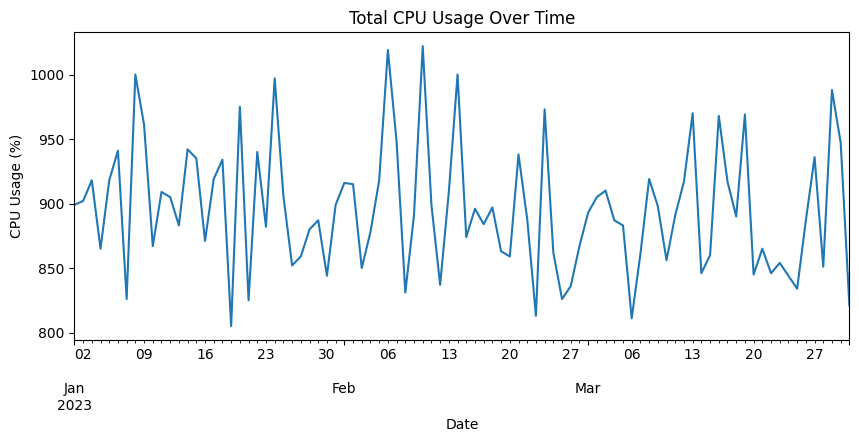

In [ ]:
#Convert 'date' column to datetime
azure_df['date'] = pd.to_datetime(azure_df['date'])

azure_df.groupby('date')['usage_cpu'].sum().plot(figsize=(10, 4))
plt.title("Total CPU Usage Over Time")
plt.xlabel("Date")
plt.ylabel("CPU Usage (%)")
plt.show()


## Plot 2: Region-wise usage distribution

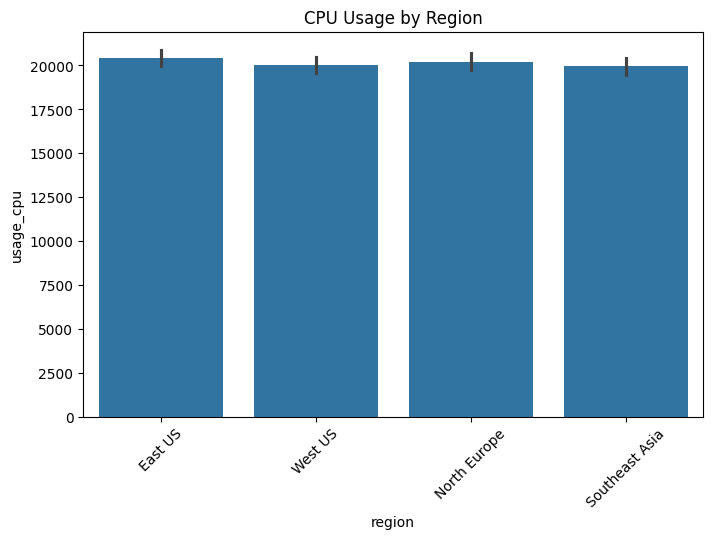

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(x='region', y='usage_cpu', data=azure_df, estimator=sum)
plt.title("CPU Usage by Region")
plt.xticks(rotation=45)
plt.show()


## Plot 3: Correlation heatmap

C:\Users\ZAHEER\AppData\Local\Temp\ipykernel_20324\4199582101.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(azure_df.corr(), annot=True, cmap='coolwarm')


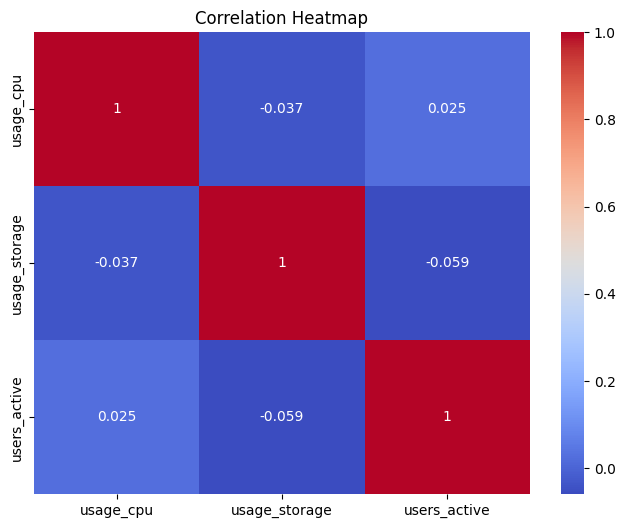

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(azure_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
